<a href="https://colab.research.google.com/github/pragneshrana/DeepLearning/blob/master/TrainingFeedForwardNN/BackPropogationVectorize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blame Game:

- The parameter that affects the output of NN are weights and bias
- Every weights and bias of associated neuron won't take responcibility of making error, rather than they blame subsquent neuron's weight for causing such error (Typical company's hierarchy :))
- Blaming process goes till last layer to first layer and everything gets corrected.



$
\underbrace{\frac{\partial \mathcal{L}}{\partial W_{111}}}_{\text{Talk to the last weight directly}} = \underbrace{\frac{\partial \mathcal{L}}{\partial \hat y}\frac{\partial \hat y}{\partial a_3}}_{\text{Talk to the previous hidden layer}}
\cdot
\underbrace{\frac{\partial \hat a_3 }{\partial h_2}\frac{\partial h_2 }{\partial a_2}}_{\text{Talk to the previous hidden layer}}
\cdot
\underbrace{\frac{\partial \hat a_2 }{\partial h_1}\frac{\partial h_1 }{\partial a_1}}_{\text{Talk to the previous hidden layer}}
\cdot
\underbrace{\frac{\partial \hat a_1 }{\partial W_{111}}}_{\text{Talk to the Weight}}$

# Output Layer

In short our interest is,

$\frac{\partial\mathcal{L}}{a_{L_i}}=\frac{\partial (-\log{\hat y})}{a_{L_i}}$

where, L = $L^{th}$ layer,    i = $i^{th}$ in $L^{th}$ layer.

$\nabla_{a_3}\mathcal{L} = \begin{bmatrix} \frac{\partial\mathcal{L}}{a_{31}} \\\frac{\partial\mathcal{L}}{a_{32}} \end{bmatrix} \text{where, L=3,i={1,2}}$



As, $\hat y $ depends on the $a_3$

$\hat y = \frac{\exp a_l}{\sum_i \exp a_{l_i}}$

$\frac{\partial\mathcal{L}}{\partial a_{L_i}}=\frac{\partial (-\log{\hat y_l})}{\partial \hat y_l}\frac{\partial \hat y_l}{\partial a_{L_i}}$




$ \frac{\partial (-\log{\hat y_l})}{\partial \hat y_l}\\
= -\frac{1}{\hat y_l} \frac{\partial}{\partial a_{L_i}}{\hat y_l}\\
= -\frac{1}{\hat y_l} \frac{\partial}{\partial a_{L_i}}{softmax(a_L)_l}  \text{, where $a_l$ is vector}\\
=-\frac{1}{\hat y} \frac{\partial}{\partial a_{L_i}}{\frac{\exp(a_L)_l}{\sum_{i'}\exp(a_L)_{i'}}}
$

Rule:
$
\frac{\partial \frac{g(x)}{h(x)}}{\partial x} =  \frac{\partial g(x)}{\partial x}\frac{1}{h(x)} -\frac{g(x)}{h(x)^2} \frac{\partial h(x)}{\partial x}
$

$=-\frac{1}{\hat y} \Bigg({\frac{\frac{\partial}{\partial a_{L_i}}\exp(a_L)_l}{\sum_{i'}\exp(a_L)_{i'}}} - \frac{\exp(a_L)_l\frac{\partial \sum_{i'}\exp(a_L)_{i'}}{\partial a_{L_i}}}{\bigg(\sum_{i'}\exp(a_L)_{i'}\bigg)^2} \Bigg)
$

$=-\frac{1}{\hat y} \Bigg({\frac{\mathbb{1}_{l=i}\exp(a_L)_{l}}{\sum_{i'}\exp(a_L)_{i'}}} - \frac{\exp(a_L)_l}{{\sum_{i'}\exp(a_L)_{i'}}}  \frac{\exp(a_L)_l}{\sum_{i'}\exp(a_L)_{i'}}\Bigg)
$

$=-\frac{1}{\hat y}(\mathbb{1}_{l=i} softmax(a_L)_l - softmax(a_L)_l softmax(a_L)_i)$

$=-\frac{1}{\hat y}(\mathbb{1}_{l=i} \hat y_l - \hat y_l \hat y_i)$

$=-(\mathbb{1}_{l=i} - \hat y_i)$



$\nabla_{a_L}\mathcal{L} = \begin{bmatrix} \frac{\partial\mathcal{L}}{a_{L1}} \\
\vdots \\
\frac{\partial\mathcal{L}}{a_{L2}} \end{bmatrix} = - (e(L) - \hat y), \text{where e(L) is one hot encoder [0 0 0 🔥 0 0]}$ 


## Hidden Layer

$\frac{\partial \mathcal{L}}{\partial h_{ij}} = \sum_{m=1}^{k} \frac{\partial \mathcal{L}}{\partial a_{i+1,m}}W_{i+1,m,j} = (W_{i+1,.,j})^T \cdot \nabla_{a_{i+1}}\mathcal{L}$

Where,\
$i \rightarrow $denotes layer\
$j \rightarrow $neuron in $i^{th} layer$ \

$W_{i+1,.,j} = \begin{bmatrix}W_{i+1,1,j}\\W_{i+1,2,j}\\\vdots \\ W_{i+1,k,j}\end{bmatrix}$

$\nabla_{a_{i+1}}\mathcal{L} = \begin{bmatrix}\frac{\partial \mathcal{L}}{\partial a_{i+1,1}}\\\frac{\partial \mathcal{L}}{\partial a_{i+1,2}}\\\vdots \\ \frac{\partial \mathcal{L}}{\partial a_{i+1,k}}\end{bmatrix}$


$\frac{\partial \mathcal{L}}{\partial h_{ij}} = \underbrace{(W_{i+1,.,j})^T}_{\text{**Weight matrix denote jth col**}} \cdot \nabla_{a_{i+1}}\mathcal{L}$\
**Calculate derive of loss function w.r.t h w.r.t any ij neuron in hidden layer**


Now, to calculate $\nabla_{h_{i}}\mathcal{L}$ in for any layer i,

$\nabla_{h_{i}}\mathcal{L} = \begin{bmatrix}\frac{\partial \mathcal{L}}{\partial h_{i,1}}\\\frac{\partial \mathcal{L}}{\partial h_{i,2}}\\\vdots \\ \frac{\partial \mathcal{L}}{\partial h_{i,k}}\end{bmatrix} 
= \begin{bmatrix}
(W_{i+1,.,1})^T \nabla_{a_{i+1}}\mathcal{L} \\
(W_{i+1,.,2})^T \nabla_{a_{i+1}}\mathcal{L}\\
\vdots \\ 
(W_{i+1,.,n})^T \nabla_{a_{i+1}}\mathcal{L}\end{bmatrix} = (W_{i+1})^T \nabla_{a_{i+1}}\mathcal{L}$ 

**This formula is applicable for output layer $\nabla_{a_{i+1}}\mathcal{L} $as, derivative w.r.t any layer is not calculated yet.\
what about $\nabla_{a_{i}}\mathcal{L} $?**

$\nabla_{a_{i}}\mathcal{L} 
= \begin{bmatrix}\frac{\partial \mathcal{L}}{\partial a_{i1}}\\\frac{\partial \mathcal{L}}{\partial a_{i2}}\\\vdots \\ \frac{\partial \mathcal{L}}{\partial a_{in}}\end{bmatrix} 
=\frac{\partial \mathcal{L}}{\partial a_{ij}} = \frac{\partial \mathcal{L}}{\partial h_{ij}} \frac{\partial h_{ij}}{\partial a_{ij}} 
= \frac{\partial \mathcal{L}}{\partial h_{ij}} g'(a_{ij}) 
=\begin{bmatrix}\frac{\partial \mathcal{L}}{\partial h_{i1}} g'(a_{i1}) \\\frac{\partial \mathcal{L}}{\partial h_{i2}}g'(a_{i2})\\\vdots \\ \frac{\partial \mathcal{L}}{\partial h_{in}}g'(a_{in})\end{bmatrix} \\
= \nabla_{h_{i}}\mathcal{L} \odot [...,g(a_{ik}) ,...]
$





# W.R.T weight

$\frac{\partial a_{ki}}{\partial W_{kij}} = h_{k-1,j}$

# Example 

for any $W_k \in \mathbb{R}^{3X3}$ ,

$\nabla W_k \mathcal{L} = 
\begin{bmatrix} 
\frac{\partial \mathcal{L}}{\partial W_{k11}} & \frac{\partial \mathcal{L}}{\partial W_{k12}} & \frac{\partial \mathcal{L}}{\partial W_{k13}} \\
\frac{\partial \mathcal{L}}{\partial W_{k21}} & \frac{\partial \mathcal{L}}{\partial W_{k22}} & \frac{\partial \mathcal{L}}{\partial W_{k23}} \\
\frac{\partial \mathcal{L}}{\partial W_{k31}} & \frac{\partial \mathcal{L}}{\partial W_{k32}} & \frac{\partial \mathcal{L}}{\partial W_{k33}} \\
\end{bmatrix}$

As every $\frac{\partial \mathcal{L}}{\partial W_{kij}} = \frac{\partial \mathcal{L}}{\partial a_{ki}} \frac{\partial a_{ki}}{\partial W_{kij}}$

$\nabla W_k \mathcal{L} = 
\begin{bmatrix} 
\frac{\partial \mathcal{L}}{\partial a_{k1}} h_{k-1,1}& \frac{\partial \mathcal{L}}{\partial a_{k1}} h_{k-1,2}& \frac{\partial \mathcal{L}}{\partial a_{k1}} h_{k-1,3} \\
\frac{\partial \mathcal{L}}{\partial a_{k2}} h_{k-1,1}& \frac{\partial \mathcal{L}}{\partial a_{k2}}h_{k-1,2} & \frac{\partial \mathcal{L}}{\partial a_{k2}} h_{k-1,3}\\
\frac{\partial \mathcal{L}}{\partial a_{k3}} h_{k-1,1}& \frac{\partial \mathcal{L}}{\partial a_{k3}} h_{k-1,2}& \frac{\partial \mathcal{L}}{\partial a_{k3}} h_{k-1,3}\\
\end{bmatrix} = \nabla a_k \mathcal{L} \cdot h_{k-1}^T$

# Derivative of Bias

$\frac{\partial \mathcal{L}}{\partial b_{ki}} = \frac{\partial \mathcal{L}}{\partial a_{ki}} \frac{\partial a_{ki}}{\partial b_{ki}}$

But, $a_{ki} = b_{ki} + \sum_j W_{kij} h_{k-1,j}$

so, $\frac{\partial a_{ki}}{\partial b_{ki}} =1$

$\frac{\partial \mathcal{L}}{\partial b_{ki}} = \frac{\partial \mathcal{L}}{\partial a_{ki}}$

$\nabla b_k \mathcal{L} = \nabla a_k \mathcal{L} $


# Algorithm

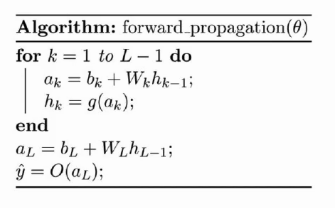

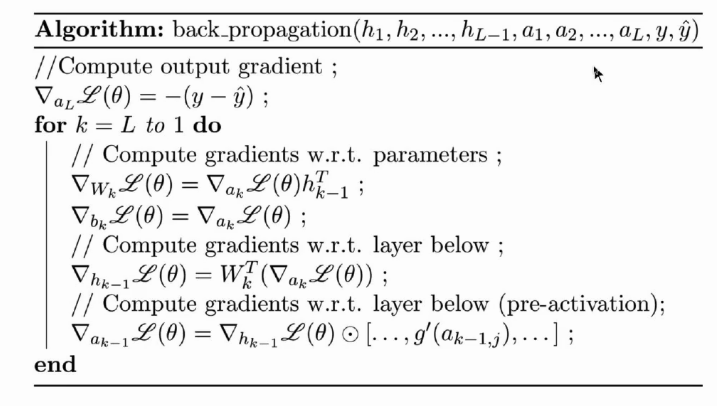

# Example:

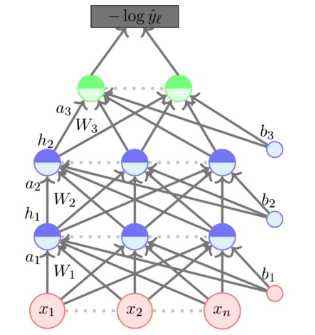

b = [0 0 0]

$W_1= 
\begin{bmatrix}
0.1 & 0.3 & 0.8 \\
-0.3 & -0.2 & 0.5 \\
-0.3 & 0.1 & 0.4
\end{bmatrix}$

$W_2= 
\begin{bmatrix}
0.4 & 0.5 & -0.3 \\
-0.1 & -0.4 & -0.5 \\
0.8 & 0.2 & 0.9
\end{bmatrix}$

$W_3= 
\begin{bmatrix}
0.3 & -0.5  \\
0.1 & 0.2  \\
-0.1 & -0.4 \\
\end{bmatrix}$

Now, x = [2 5 3] & y = [1 0]

# Forward pass
$a_1 = W_1 x * b_1 = $[-2.2 -0.1 5.3] \
$h_1 = \tanh(a_1)= $[-0.97 -0.1 0.99] \
$a_2 = W_2 h_1 * b_2 = $[0.41 -0.24 1.24] 
$h_1 = \tanh(a_2)= $[0.39 -0.24 0.84] \
$a_3 = W_3 h_2 * b_3 = $[-0.01 0.58] 
$\hat y = softmax(a_3) = $[0.64 0.36]
$\mathcal{L} = -\log \hat y = 0.43$ 

# Backward Pass
$\nabla_{a_3} \mathcal{L} $$= \begin{bmatrix}
\frac{\partial L}{\partial a_{31}} \\
\frac{\partial L}{\partial a_{32}} \\
\end{bmatrix}
=
\begin{bmatrix}
(-(1_{l=1}-\hat y_1)\\
(-(1_{l=2}-\hat y_2)
\end{bmatrix}
= 
\begin{bmatrix}
-(1-0.64)\\
-(1-0.36)
\end{bmatrix}
=
\begin{bmatrix}
-0.36\\
0.36 \\
\end{bmatrix}
$

$\nabla_{h_2} \mathcal{L} $$= \begin{bmatrix}
\frac{\partial L}{\partial h_{21}} \\
\frac{\partial L}{\partial h_{22}} \\
\frac{\partial L}{\partial h_{23}} \\
\end{bmatrix}
=
W_2^T \nabla_{a_2} \mathcal{L}
=
\begin{bmatrix}
0.23 \\
-0.03\\
0.09\\
\end{bmatrix}
$

$\nabla_{a_2} \mathcal{L} $$= \begin{bmatrix}
\frac{\partial L}{\partial a_{21}} \\
\frac{\partial L}{\partial a_{22}} \\
\frac{\partial L}{\partial a_{23}} \\
\end{bmatrix}
=
\begin{bmatrix}
\frac{\partial L}{\partial h_{21}} g'(a_{21})\\
\frac{\partial L}{\partial h_{22}} g'(a_{22})\\
\frac{\partial L}{\partial h_{23}} g'(a_{23})\\
\end{bmatrix}
=
\begin{bmatrix}
0.19\\
-0.03\\
0.02\\
\end{bmatrix}$


$\nabla_{W_2} \mathcal{L} =\begin{bmatrix}
\frac{\partial L}{\partial a_{21}}\\
\frac{\partial L}{\partial a_{22}}\\
\frac{\partial L}{\partial a_{23}}\\
\end{bmatrix}$
$
\begin{bmatrix}
h_{11} & h_{12} & h_{13}
\end{bmatrix} = 
\begin{bmatrix}
-0.19 & 0.08 & -0.02\\
-0.02 & 0.01 & -0.01\\
0.2 & -0.03 & 0.02
\end{bmatrix}$ 


By using above we can update weight matrix.

**Note : Number crunching might be wrong**